## Describing Distributions

### Author:  Sheneka Allen

In [21]:
# Import standard libraries and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [22]:
# load dataset
med_df = pd.read_csv('data.csv')
med_df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [23]:
# rename Pandas columns to lower case
med_df.columns= med_df.columns.str.lower()
med_df.columns

Index(['state', 'lat', 'lng', 'area', 'children', 'age', 'income', 'marital',
       'gender', 'readmis', 'vitd_levels', 'doc_visits', 'full_meals_eaten',
       'vitd_supp', 'soft_drink', 'initial_admin', 'highblood', 'stroke',
       'complication_risk', 'overweight', 'arthritis', 'diabetes',
       'hyperlipidemia', 'backpain', 'anxiety', 'allergic_rhinitis',
       'reflux_esophagitis', 'asthma', 'services', 'initial_days',
       'totalcharge', 'additional_charges'],
      dtype='object')

In [24]:

# Answer the following questions:
# Is it Discrete or Continuous?
# Does it have a skew? If so, which direction (+/-)
# What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

## Histogram plot of vitd_levels, doc_visits and totalcharge features

### Add the following lines:

- kde (kernel density estimate)
- mean (red)
- median (green)
- +1 std from the mean (black)
- -1 std from the mean (black)
- Highlight the range between +1 and =1 std (yellow)

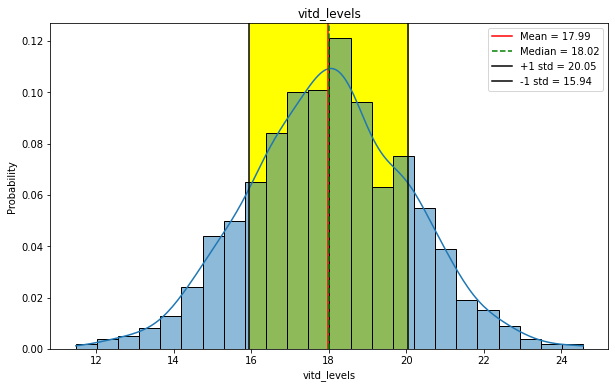

In [25]:
# Visual representation of the Probability Mass Function (PMF) for vitamin D levels
## Density measures the probability vitamin D levels will occur in that bin/bar group

## Estimate the continuous probabilities by transforming discrete PMF bars 
# into a smoothed curve called a Kernal Density Estimate (KDE).

### Measures of Central Tendency” (mean, median, and mode) describe the "center" of the data
# distributed.  This data can be skewed positively and negatively within a bounding range 


col = 'vitd_levels'
feature = med_df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature, ax=ax, kde=True, stat='probability')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder=0)
ax.set_title(f'{col}')
ax.legend();

In [26]:
#### Kurtosis is a statistical measure used to describe the degree to which the distribution of 
# values cluster in the tails or the peak of a frequency distribution.
# Using the Pearson calculation, 
# Mesokurtic (Kurtosis ~3)
# Leptokurtic (Kurtosis >3)     
# Platykurtic (Kurtosis < 3) 

# kurt calc requires scipy lib
kurt = stats.kurtosis(feature, fisher = False)
print(kurt)

3.013147515833447


## Assessment of VitD graph

### Is it Discrete or Continuous? 
- Ans: Continuous, vitD values can fall within a range of values

### Does it have a skew? If so, which direction (+/-) 
- Ans:  Yes, skewed slightly positive and to the right.

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
- Ans: Leptokurtic since 3.013 >3

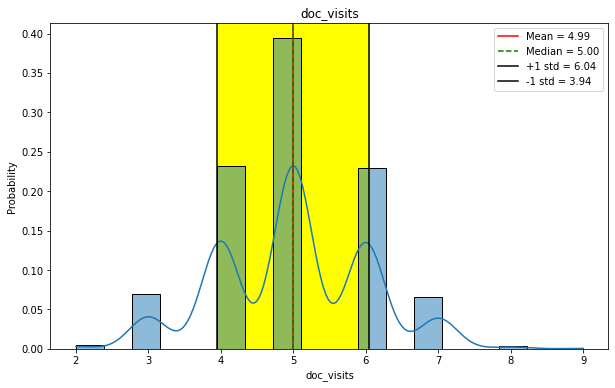

In [27]:
# visual representation of the Probability Mass Function (PMF) for doctor visits
## Density measures the probability doctor visits will occur in that bin/bar group

col1 = 'doc_visits'
feature1 = med_df[col1]
mean1 = feature1.mean()
median1 = feature1.median()
std1 = feature1.std()
plus_one_std1 = mean1 + std1
minus_one_std1 = mean1 - std1
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature1, ax=ax, kde = True, stat='probability')
ax.axvline(mean1, color = 'red',label=f'Mean = {mean1:,.2f}')
ax.axvline(median1, ls='--', color = 'green', label = f'Median = {median1:,.2f}')
ax.axvline(plus_one_std1, color = 'black',label=f'+1 std = {plus_one_std1:,.2f}')
ax.axvline(minus_one_std1, color = 'black', label = f'-1 std = {minus_one_std1:,.2f}')
ax.axvspan(plus_one_std1, minus_one_std1, color = 'yellow', zorder=0)
ax.set_title(f'{col1}')
ax.legend();

In [28]:
# kurt calc requires scipy lib
kurt1 = stats.kurtosis(feature1, fisher = False)
print(kurt1)

2.9919958083381206


## Assessment of Doctor Visits graph

### Is it Discrete or Continuous?
- Ans: Discrete.  NO such thing as a .5876 visit to the doctor, LoL. Definitely a whole number.

### Does it have a skew? If so, which direction (+/-)
- Ans: No, values are normally distributed

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
- Ans: Mesokurtic since 2.9919958083381206 is ~3.

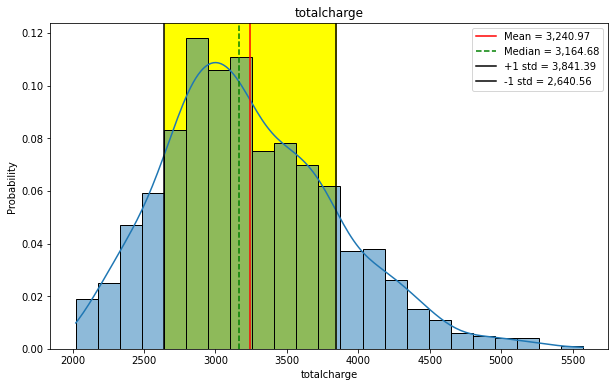

In [29]:
# visual representation of the Probability Mass Function (PMF) for total charge.
## Density measures the probability total charge will occur in that bin/bar group

#plt.subplots(figsize=(10,5))
#sns.histplot(data=med_df, x='totalcharge', discrete = True, stat='density');

col2 = 'totalcharge'
feature2 = med_df[col2]
mean2 = feature2.mean()
median2 = feature2.median()
std2 = feature2.std()
plus_one_std2 = mean2 + std2
minus_one_std2 = mean2 - std2
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature2, ax=ax, kde = True, stat='probability')
ax.axvline(mean2, color = 'red',label=f'Mean = {mean2:,.2f}')
ax.axvline(median2, ls='--', color = 'green', label = f'Median = {median2:,.2f}')
ax.axvline(plus_one_std2, color = 'black',label=f'+1 std = {plus_one_std2:,.2f}')
ax.axvline(minus_one_std2, color = 'black', label = f'-1 std = {minus_one_std2:,.2f}')
ax.axvspan(plus_one_std2, minus_one_std2, color = 'yellow', zorder=0)
ax.set_title(f'{col2}')
ax.legend();

In [30]:
# kurt calc requires scipy lib
kurt2 = stats.kurtosis(feature2, fisher = False)
print(kurt2)

3.2650077463439384


## Assessment of Total Charges graph

### Is it Discrete or Continuous?
- Ans: Continuous, values are within a range.
    
### Does it have a skew? If so, which direction (+/-)
- Ans: Yes, graph skewed positive and to the right.
    
### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
- Ans: Leptokurtic since 3.26500 >3